<a href="https://colab.research.google.com/github/IgorB99/aula_robotica/blob/master/aula_robotica_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#atividade 1

In [485]:
#criador aleatório de padrões de quadrados, círculos e triângulos

import cv2
import numpy as np
import csv
import random

#criar o csv

f = open('dataset.csv', 'w', newline='')
writer = csv.writer(f)
row = []

for n in range(10000):
  row.append(n)

row.append("Saida")
writer.writerow(row)

#criar as imagens

def rectangle():
  altura = 100
  largura = 100
  img = np.zeros([altura, largura, 3])
  for py in range(altura):
    for px in range(largura):
      img[py][px][0] = 255
      img[py][px][1] = 255
      img[py][px][2] = 255

  xy1 = int(random.uniform(0, 45))
  xy2 = int(random.uniform(55, 100))
  cv2.rectangle(img, (xy1, xy1), (xy2, xy2), (0, 0, 0), -1)
  return img

def circle():
  altura = 100
  largura = 100
  img = np.zeros([altura, largura, 3])
  for py in range(altura):
    for px in range(largura):
      img[py][px][0] = 255
      img[py][px][1] = 255
      img[py][px][2] = 255
  
  x = int(random.uniform(25, 75))
  y = int(random.uniform(25, 75))
  d = int(random.uniform(10, 30))
  cv2.circle(img, (x, y), d, (0, 0, 0), -1)
  return img

def triangle():
  altura = 100
  largura = 100
  img = np.zeros([altura, largura, 3])
  for py in range(altura):
    for px in range(largura):
      img[py][px][0] = 255
      img[py][px][1] = 255
      img[py][px][2] = 255

  x1 = int(random.uniform(25, 75))
  x2 = int(random.uniform(0, 40))
  x3 = int(random.uniform(60, 100))
  y1 = int(random.uniform(0, 40))
  y2 = int(random.uniform(60, 100))
  y3 = int(random.uniform(60, 100))

  t1 = (x1, y1)
  t2 = (x2, y2)
  t3 = (x3, y3)
  n = np.array([t1, t2, t3])
  cv2.drawContours(img, [n], 0, (0,0,0), -1)
  return img

#ler as imagens e armazenar no dataset

for quadrado in range(1000):
  img = rectangle()
  altura, largura, pixel = np.shape(img)
  row = []
  for py in range(altura):
    for px in range(largura):
      row.append(img[py][px][0])
  row.append(0)
  writer.writerow(row)

for circulo in range(50):
  img = circle()
  altura, largura, pixel = np.shape(img)
  row = []
  for py in range(altura):
    for px in range(largura):
      row.append(img[py][px][0])
  row.append(1)
  writer.writerow(row)

for triangulo in range(100):
  img = triangle()
  altura, largura, pixel = np.shape(img)
  row = []
  for py in range(altura):
    for px in range(largura):
      row.append(img[py][px][0])
  row.append(2)
  writer.writerow(row)

In [486]:
#leitor de arquivo CSV

import pandas as pd

dados = pd.read_csv("dataset.csv")
dados.head()

dados_entrada = dados.drop("Saida", axis=1)
dados_saida = dados["Saida"]

In [552]:
#rede Neural

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

dados_entrada_treino, dados_entrada_teste, dados_saida_treino, dados_saida_teste = train_test_split(dados_entrada, dados_saida, test_size=0.5, random_state = 42, shuffle=True)

normaliza = StandardScaler()
normaliza = normaliza.fit(dados_entrada_treino)

dados_entrada_treino = normaliza.transform(dados_entrada_treino)
dados_entrada_teste = normaliza.transform(dados_entrada_teste)

clf = MLPClassifier(activation = "logistic", solver = "lbfgs", max_iter = 100)
clf = clf.fit(dados_entrada_treino, dados_saida_treino)

In [566]:
#teste da rede

from sklearn.metrics import accuracy_score

calculado = clf.predict(dados_entrada_teste)
real = dados_saida_teste.values
print("Calculado: ",calculado[0:5])
print("Saida: ",real[0:5])

print(accuracy_score(real, calculado))

Calculado:  [0 0 0 0 0]
Saida:  [0 0 0 0 0]
0.9721739130434782


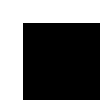

quadrado


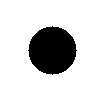

círculo


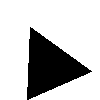

triângulo


In [565]:
#teste com criador de imagens aleatórias 

import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import random

def cal(x):
  if x == 0:
    resultado = "quadrado"
  elif x == 1:
    resultado = "círculo"
  elif x == 2:
    resultado = "triângulo"
  return resultado

def rectangle():
  altura = 100
  largura = 100
  img = np.zeros([altura, largura, 3])
  for py in range(altura):
    for px in range(largura):
      img[py][px][0] = 255
      img[py][px][1] = 255
      img[py][px][2] = 255

  xy1 = int(random.uniform(0, 45))
  xy2 = int(random.uniform(55, 100))
  cv2.rectangle(img, (xy1, xy1), (xy2, xy2), (0, 0, 0), -1)
  cv2_imshow(img)

  altura, largura, pixel = np.shape(img)
  dado = []
  for py in range(altura):
    for px in range(largura):
      dado.append(img[py][px][0])
  calculado = clf.predict([dado])
  resultado = cal(calculado)
  print(resultado)

def circle():
  altura = 100
  largura = 100
  img = np.zeros([altura, largura, 3])
  for py in range(altura):
    for px in range(largura):
      img[py][px][0] = 255
      img[py][px][1] = 255
      img[py][px][2] = 255
  
  x = int(random.uniform(25, 75))
  y = int(random.uniform(25, 75))
  d = int(random.uniform(10, 30))
  cv2.circle(img, (x, y), d, (0, 0, 0), -1)
  cv2_imshow(img)

  altura, largura, pixel = np.shape(img)
  dado = []
  for py in range(altura):
    for px in range(largura):
      dado.append(img[py][px][0])
  calculado = clf.predict([dado])
  resultado = cal(calculado)
  print(resultado)

def triangle():
  altura = 100
  largura = 100
  img = np.zeros([altura, largura, 3])
  for py in range(altura):
    for px in range(largura):
      img[py][px][0] = 255
      img[py][px][1] = 255
      img[py][px][2] = 255

  x1 = int(random.uniform(25, 75))
  x2 = int(random.uniform(0, 40))
  x3 = int(random.uniform(60, 100))
  y1 = int(random.uniform(0, 40))
  y2 = int(random.uniform(60, 100))
  y3 = int(random.uniform(60, 100))

  t1 = (x1, y1)
  t2 = (x2, y2)
  t3 = (x3, y3)
  n = np.array([t1, t2, t3])
  cv2.drawContours(img, [n], 0, (0,0,0), -1)
  cv2_imshow(img)

  altura, largura, pixel = np.shape(img)
  dado = []
  for py in range(altura):
    for px in range(largura):
      dado.append(img[py][px][0])
  calculado = clf.predict([dado])
  resultado = cal(calculado)
  print(resultado)

rectangle()
circle()
triangle()

#aula 23/10

In [ ]:
#obs: é necessario rodar o programa duas vezes
import cv2
import numpy as np
import csv
import random

dados = np.zeros([400,4])

f = open('dataset.csv', 'w', newline='')
writer = csv.writer(f)
row = ["blue","red", "green", "Saida"]
writer.writerow(row)

def data(start, end, index, blue1, blue2, red1, red2, green1, green2):
  for n in range(start, end):
    cor_0 = int(random.uniform(blue1, blue2))
    cor_1 = int(random.uniform(red1, red2))
    cor_2 = int(random.uniform(green1, green2))
    dados[n, 0] = cor_0
    dados[n, 1] = cor_1
    dados[n, 2] = cor_2
    dados[n, 3] = index
    
    row = dados[n]
    writer.writerow(row)

data(0, 100, 0, 160, 255, 0, 95, 0, 95)
data(100, 200, 1, 0, 95, 160, 255, 0, 95)
data(200, 300, 2, 0, 95, 0, 95, 160, 255)

In [ ]:
import pandas as pd

dados = pd.read_csv("dataset.csv")
dados.head()

dados_entrada = dados.drop("Saida", axis=1)
dados_saida = dados["Saida"]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

dados_entrada_treino, dados_entrada_teste, dados_saida_treino, dados_saida_teste = train_test_split(dados_entrada, dados_saida, test_size=0.5, random_state = 42, shuffle=True)

normaliza = StandardScaler()
normaliza = normaliza.fit(dados_entrada_treino)

dados_entrada_treino = normaliza.transform(dados_entrada_treino)
dados_entrada_teste = normaliza.transform(dados_entrada_teste)

clf = MLPClassifier(activation = "logistic", solver = "lbfgs", max_iter = 500)
clf = clf.fit(dados_entrada_treino, dados_saida_treino)

In [ ]:
calculado = clf.predict(dados_entrada_teste)
real = dados_saida_teste.values
print("Calculado: ", calculado[0:5])
print("Saida: ", real[0:5])

Calculado:  [2. 2. 1. 0. 2.]
Saida:  [2. 2. 1. 0. 2.]


In [ ]:
from sklearn.metrics import accuracy_score

calculado = clf.predict(dados_entrada_teste)
real = dados_saida_teste.values
print("Calculado: ",calculado[0:5])
print("Saida: ",real[0:5])

print (accuracy_score(real, calculado))

Calculado:  [2. 2. 1. 0. 2.]
Saida:  [2. 2. 1. 0. 2.]
1.0


vermelho


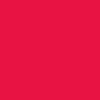

verde


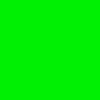

azul


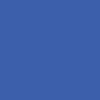

In [ ]:
import cv2
import numpy as np
import statistics
from IPython.display import Image

def identificar_cor(image):
  img = cv2.imread(image)
  height, width, pixel = np.shape(img)
  azul = []
  vermelho = []
  verde = []

  for index in range(pixel):
    for py in range(altura):
      for px in range(largura):
        if index == 0:
          azul.append(img[py][px][0])
        elif index == 1:
          verde.append(img[py][px][1])
        elif index == 2:
          vermelho.append(img[py][px][2])

  cor1 = statistics.mode(azul)
  cor2 = statistics.mode(vermelho)
  cor3 = statistics.mode(verde)

  calculado = clf.predict([[cor1, cor2, cor3]])
  if calculado == 0:
    print("azul")
  elif calculado == 1:
    print("vermelho")
  elif calculado == 2:
    print("verde")

  display(Image(image))

identificar_cor("color_img1.png")
identificar_cor("color_img2.png")
identificar_cor("color_img3.png")

#aula 22/10

In [ ]:
#Criar dados
import numpy as np
import matplotlib.pyplot as plt
import csv
import random
qtde =1000

VHmin = 3.0
VLmax = 1.0

dados = np.zeros([qtde,3])

for index in range( 0, qtde-1):
  A_LOW = random.uniform(0.0, VLmax)
  A_HIGH = random.uniform( VHmin, 5.0)
  B_LOW = random.uniform(0.0, VLmax)
  B_HIGH =random.uniform(VHmin, 5.0)
  valor = random.randint(0,3)
  if (valor == 0):
    dados[index,0]= A_LOW
    dados[index,1]= B_LOW
  elif (valor == 1):
    dados[index,0]= A_LOW
    dados[index,1]= B_HIGH
    dados[index,2]= 1
  elif ( valor == 2):
    dados[index,0]= A_HIGH
    dados[index,1]= B_LOW
    dados[index,2]= 1
  else:
    dados[index,0]= A_HIGH
    dados[index,1]= B_HIGH
    dados[index,2]= 0
  f = open('dataset.csv', 'w', newline='')
  with f:
    writer = csv.writer(f)
    row = ["A","B","Saida"]
    writer.writerow( row )
    for index in range( 0, qtde) :
      row = dados[index]
      writer.writerow( row )

In [ ]:
import pandas as pd
dados = pd.read_csv("dataset.csv")
dados.head()

dados_entrada = dados.drop("Saida", axis=1)
dados_saida = dados["Saida"]

In [ ]:
from sklearn.model_selection import train_test_split

dados_entrada_treino, dados_entrada_teste, dados_saida_treino, dados_saida_teste = train_test_split(dados_entrada, dados_saida, test_size=0.3, random_state = 42, shuffle=True)

In [ ]:
#Normalizacao dos dados
from sklearn.preprocessing import StandardScaler

normaliza = StandardScaler()
normaliza = normaliza.fit(dados_entrada_treino)

dados_entrada_treino = normaliza.transform(dados_entrada_treino)
dados_entrada_teste = normaliza.transform(dados_entrada_teste)

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(activation='logistic', solver='lbfgs', max_iter = 500)
clf = clf.fit(dados_entrada_treino, dados_saida_treino)

In [ ]:
calculado = clf.predict(dados_entrada_teste)
real = dados_saida_teste.values
print("Calculado: ", calculado[0:5])
print("Saida: ", real[0:5])

Calculado:  [0. 0. 1. 1. 0.]
Saida:  [0. 1. 1. 0. 0.]


In [ ]:
from sklearn.metrics import accuracy_score

calculado = clf.predict(dados_entrada_teste)
real = dados_saida_teste.values
print("Calculado: ",calculado[0:5])
print("Saida: ",real[0:5])

print (accuracy_score(real, calculado))

Calculado:  [0. 0. 1. 1. 0.]
Saida:  [0. 1. 1. 0. 0.]
0.5533333333333333


In [ ]:
calculado = clf.predict([[4.00, 4.1]])
print(calculado[0])

1


Exercício

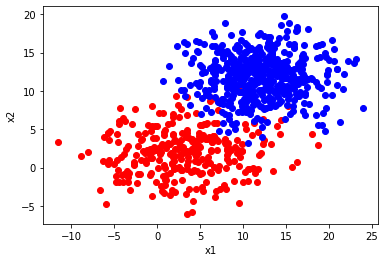

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import csv

x1_range = np.linspace(-40,40,200)
Ax1 = np.random.normal(3, 5, 300)
Ax2 = np.random.normal(2, 3, 300)
Bx1 = np.random.normal(12, 4, 500)
Bx2 = np.random.normal(12, 3, 500)

plt.plot(Ax1, Ax2,'ro',color = 'red')
plt.plot(Bx1, Bx2,'ro',color = 'blue')
plt.xlabel('x1')
plt.ylabel('x2')

f = open('amostra.csv', 'w', newline='')
with f:
  writer = csv.writer(f)
  row = ["A","B","Saida"]
  writer.writerow(row)
  for index in range( 0, len(Ax1)):
    row = str(Ax1[index]), str( Ax2[index]), 0
    writer.writerow(row)
    row = str(Bx1[index]), str(Bx2[index]), 1
    writer.writerow(row)


In [ ]:
import pandas as pd
dados = pd.read_csv("amostra.csv")
dados.head()

dados_in = dados.drop("Saida", axis=1)
dados_out = dados["Saida"]

In [ ]:
from sklearn.model_selection import train_test_split

dados_in_treino, dados_in_teste, dados_out_treino, dados_out_teste = train_test_split(dados_in, dados_out, test_size=0.3, random_state = 42, shuffle=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

normaliza = StandardScaler()
normaliza = normaliza.fit(dados_in_treino)

dados_in_treino = normaliza.transform(dados_in_treino)
dados_in_teste = normaliza.transform(dados_in_teste)

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(activation='logistic', solver='lbfgs', max_iter = 500)
clf = clf.fit(dados_in_treino, dados_out_treino)

In [ ]:
calculado = clf.predict(dados_in_teste)
real = dados_out_teste.values
print("Calculado: ", calculado[0:5])
print("Saida: ", real[0:5])

Calculado:  [0 1 1 1 1]
Saida:  [0 1 1 1 1]


In [ ]:
from sklearn.metrics import accuracy_score

calculado = clf.predict(dados_in_teste)
real = dados_out_teste.values
print("Calculado: ",calculado[0:5])
print("Saida: ",real[0:5])

print (accuracy_score(real, calculado))

Calculado:  [0 1 1 1 1]
Saida:  [0 1 1 1 1]
0.9722222222222222


In [ ]:
calculado = clf.predict([[2, -2]])
if calculado[0] == 0:
  print("vermelho")
else:
  print("azul")

vermelho


#aula 15/10

<h1>Exercício</h1>
<br>• Implemente o código em python dos cálculos da rede neural.
<br>• Faça a interação de 1000 e verifique o erro.
<br>• Faça a interação de 10000 e verifique o erro.

In [ ]:
from math import e

y1 = 0.01
y2 = 0.99
x1 = 0.05
x2 = 0.1
b1 = 0.35
b2 = 0.6
w1 = 0.15
w2 = 0.2
w3 = 0.25
w4 = 0.3
w5 = 0.4
w6 = 0.45
w7 = 0.5
w8 = 0.55

def uh_uo(b, x1, x2, w1, w2):
  u = (1 * b) + (x1 * w1) + (x2 * w2)
  return u

def gh_go(x):
  g = 1 / (1 + e**(-x))
  return g

#recalcular w5, w6, w7 e w8

def erroTotal_W_Maior(y, gon, ghn, w):
  erroTotal_go = - (y - gon)
  go_uo = gon * (1 - gon)

  erroTotal_w = erroTotal_go * go_uo * ghn
  new_w = w - (0.5 * erroTotal_w)
  return new_w

#recalcular w1, w2, w3 e w4

def erroTotal_W_Menor(w1, w2, ghn, x, w):
  erroTotal_gh = (0.138498562 * w1) + ((-0.038098237) * w2)
  gh_uh = ghn * (1 - ghn)

  erroTotal_w = erroTotal_gh * gh_uh * x
  new_w = w - (0.5 * erroTotal_w)
  return new_w


for n in range(1000):
  uh1 = uh_uo(b1, x1, x2, w1, w2)
  uh2 = uh_uo(b1, x1, x2, w3, w4)

  gh1 = gh_go(uh1)
  gh2 = gh_go(uh2)

  uo1 = uh_uo(b2, gh1, gh2, w5, w6)
  uo2 = uh_uo(b2, gh1, gh2, w7, w8)

  go1 = gh_go(uo1)
  go2 = gh_go(uo2)

  w1 = erroTotal_W_Menor(w5, w7, gh1, x1, w1)
  w2 = erroTotal_W_Menor(w5, w7, gh1, x2, w2)
  w3 = erroTotal_W_Menor(w6, w8, gh2, x1, w3)
  w4 = erroTotal_W_Menor(w6, w8, gh2, x2, w4)
  w5 = erroTotal_W_Maior(y1, go1, gh1, w5)
  w6 = erroTotal_W_Maior(y1, go1, gh2, w6)
  w7 = erroTotal_W_Maior(y2, go2, gh1, w7)
  w8 = erroTotal_W_Maior(y2, go2, gh2, w8)

uh1 = uh_uo(b1, x1, x2, w1, w2)
uh2 = uh_uo(b1, x1, x2, w3, w4)

gh1 = gh_go(uh1)
gh2 = gh_go(uh2)

uo1 = uh_uo(b2, gh1, gh2, w5, w6)
uo2 = uh_uo(b2, gh1, gh2, w7, w8)

go1 = gh_go(uo1)
go2 = gh_go(uo2)

erroTotal = ((1/2)*((y1 - go1)**2)) + ((1/2)*((y2 - go2)**2))

print("w1: ", w1)
print("w2: ", w2)
print("w3: ", w3)
print("w4: ", w4)
print("w5: ", w5)
print("w6: ", w6)
print("w7: ", w7)
print("w8: ", w8)
print("erro total: ", erroTotal)

w1:  2.390614107512895
w2:  4.68122821502579
w3:  2.468254856252174
w4:  4.7365097125043505
w5:  -2.863537052353556
w6:  -2.8319553924994367
w7:  1.93097720006781
w8:  1.9885271211968099
erro total:  0.00042205816726551866


#aula 08/10

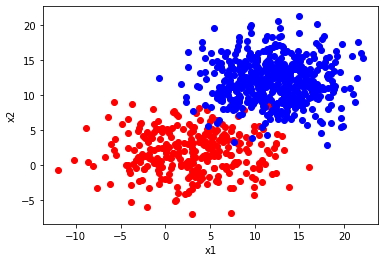

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import csv

x1_range = np.linspace(-40,40,200)
Ax1 = np.random.normal(3, 5, 300)
Ax2 = np.random.normal(2, 3, 300)
Bx1 = np.random.normal(12, 4, 500)
Bx2 = np.random.normal(12, 3, 500)

plt.plot(Ax1, Ax2,'ro',color = 'red')
plt.plot(Bx1, Bx2,'ro',color = 'blue')
plt.xlabel('x1')
plt.ylabel('x2')

f = open('amostraA.csv', 'w', newline='')
with f:
  writer = csv.writer(f)
  for index in range( 0, len( Ax1)):
    row = str(Ax1[index]), str( Ax2[index])
    writer.writerow( row )

f = open('amostraB.csv', 'w', newline='')
with f:
  writer = csv.writer(f)
  for index in range( 0, len( Bx1)) :
    row = str(Bx1[index]), str(Bx2[index])
    writer.writerow( row )

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import csv

Ax1 = np.random.normal(20, 2, 2)

print(Ax1)

[20.96943867 22.14781387]


-1.0   14.0   18   12   30
Fim



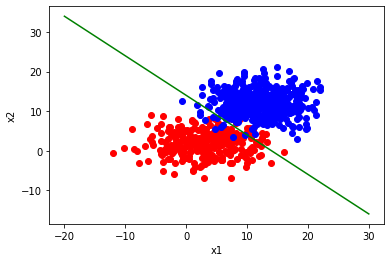

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import csv

x1_range = np.linspace(-20,30,200)

f = open('amostraA.csv', 'r')
with f:
  reader = csv.reader(f, delimiter=",")
  rowsA = len(list(reader))

f = open('amostraA.csv', 'r')
with f:
  reader = csv.reader(f, delimiter=",")
  Ax1 = np.zeros(rowsA)
  Ax2 = np.zeros(rowsA)
  cont = 0
  for row in reader:
    Ax1[cont] = row[0]
    Ax2[cont] = row[1]
    cont = cont + 1

f = open('amostraB.csv', 'r')
with f:
  reader = csv.reader(f, delimiter=",")
  rowsB = len(list(reader))

f = open('amostraB.csv', 'r')
with f:
  reader = csv.reader(f, delimiter=",")
  Bx1 = np.zeros(rowsB)
  Bx2 = np.zeros(rowsB)
  cont = 0
  for row in reader:
    Bx1[cont] = row[0]
    Bx2[cont] = row[1]
    cont = cont + 1

plt.plot(Ax1, Ax2,'ro',color = 'red')
plt.plot(Bx1, Bx2,'ro',color = 'blue')
plt.xlabel('x1')
plt.ylabel('x2')

a = -1.0
b = 14.0

contErrA = 0
for index in range(0, len(Ax1)):
  if (Ax2[index] > (Ax1[index]*a + b) ):
    contErrA = contErrA + 1

contErrB = 0
for index in range(0, len(Bx1)):
  if (Bx2[index] < (Bx1[index]*a + b) ):
    contErrB = contErrB + 1

err_Total = contErrA + contErrB
print(a, " ",b," ", contErrA," ",contErrB," ",err_Total,end="\n")
plt.plot(x1_range, a*x1_range + b, '-g')
print ("Fim\n")

#aula 02/10

porta not

In [ ]:
import numpy as np

def calculo_z (lista_w, lista_x):
  tamanho = len(lista_w)
  z = 0
  for index in range( 0, tamanho):
    z = z + lista_w[index]* lista_x[index]
  return z

lista_w = [1,-1]
lista_x = [1, 0]
valor = calculo_z(lista_w,lista_x)
print (valor, end="\n")

1


porta and, or, nand e nor

In [ ]:
import numpy as np

def calculo_z(lista_w, lista_x):
  tamanho = len(lista_w)
  z = 0
  for index in range(tamanho):
    z = z + lista_w[index]* lista_x[index]
  return z

def funcao_degrau(valor, n):
  if valor >= n:
    valor = 1
  else:
    valor = 0
  return valor

def calculo_not(lista_w_not, lista_x_not):
  tamanho = len(lista_w_not)
  z = 0
  for index in range( 0, tamanho):
    z = z + lista_w_not[index]* lista_x_not[index]
  return z

lista_w = [0, 1, 1]
lista_x = [1, 1, 1]

print("1 - or\n2 - and\n3 - nand\n4 - nor")
n = int(input())

if n == 1:
  valor = calculo_z(lista_w, lista_x)
  valor = funcao_degrau(valor, 1)
  print(valor)
elif n == 2:
  valor = calculo_z(lista_w, lista_x)
  valor = funcao_degrau(valor, 2)
  print(valor)
elif n == 3:
  valor = calculo_z(lista_w, lista_x)
  valor = funcao_degrau(valor, 2)
  lista_w_not = [1, -1]
  lista_x_not = [1, valor]
  valor = calculo_not(lista_w_not, lista_x_not)
  print(valor)
elif n == 4:
  valor = calculo_z(lista_w, lista_x)
  valor = funcao_degrau(valor, 1)
  lista_w_not = [1, -1]
  lista_x_not = [1, valor]
  valor = calculo_not(lista_w_not, lista_x_not)
  print(valor)

1 - or
2 - and
3 - nand
4 - nor
4
0


#aula 25/09

[3, 18, 19, 22, 35, 52]


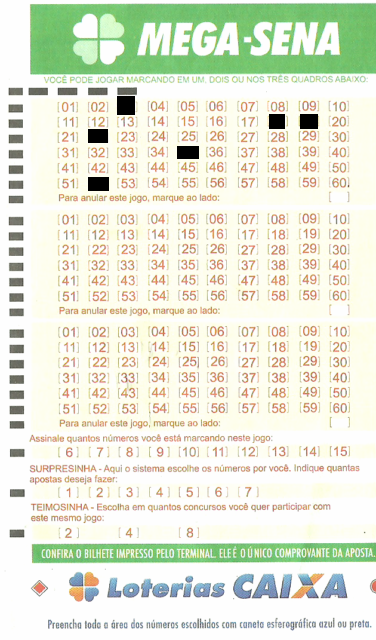

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread("Loterias-Mega-376x640_jogo.png")

lista = []
for py in range(100, 190):
  for px in range(55, 350):
    if img[py][px][0] == 0 and img[py][px][1] == 0 and img[py][px][2] == 0:
      if img[py - 3][px][0] == 0 and img[py - 3][px][1] == 0 and img[py - 3][px][2] == 0:
        num1 = (int(((py - 100) * 6) / 90)) * 10
        num2 = int((((px - 55) * 10) / 295) + 1)
        if num2 == 10:
          num2 = 0
        numero = num1 + num2
        if numero in lista:
          continue
        else:
          lista.append(numero)

print(lista)
cv2_imshow(img)

#aula 24/09

I'm Scatman PIPAPAPAROPO


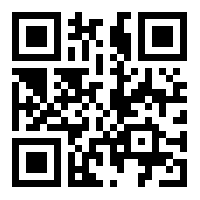

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread('download.png')
qrCodeDetector = cv2.QRCodeDetector()
decodedText, points, _ = qrCodeDetector.detectAndDecode(image)

if points is not None:
  print(decodedText)
  cv2_imshow(image)
else:
  print("QR code not detected")



digite um texto: hello world


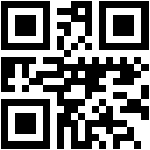

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import urllib.request

texto = input("digite um texto: ")
texto = texto.replace(" ", "%20")

url = "https://api.qrserver.com/v1/create-qr-code/?size=150x150&data=" + texto
url_request = urllib.request.urlopen(url)
img_array = np.array(bytearray(url_request.read()), dtype=np.uint8)
img = cv2.imdecode(img_array, -1)

cv2_imshow(img)

#aula 17/09

34 30 67 67


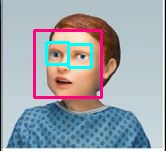

In [ ]:
import numpy as np
import cv2
from IPython.display import Image

face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
eye_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")
imagem = cv2.imread('Capturar.JPG')
gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
faces = face_classifier.detectMultiScale(gray, 1.03, 5)

if faces is ():
  print("sem face")
for (x,y,w,h) in faces:
  cv2.rectangle(imagem, (x,y) , (x+w,y+h) , (127,0,255),2)
  roi_gray = gray[y:y+h, x:x+w]
  roi_color = imagem[y:y+h, x:x+w]
  eyes = eye_classifier.detectMultiScale(roi_gray)
  if eyes is ():
    print("sem olhos")
  elif eyes is (1):
    print("falta um olho")
  for (ex,ey,ew,eh) in eyes:
    cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)
print(x, y, w, h)

cv2.imwrite('img.jpg', imagem)
filename = "img.jpg"
display(Image(filename))

In [ ]:
import cv2
import numpy as np
from IPython.display import Image

fece_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
eye_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")
img1 = cv2.imread("Capturar.JPG")
img2 = cv2.imread("Capturar2.JPG")
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
face1 = face_classifier.detectMultiScale(gray1, 1.03, 5)
face2 = face_classifier.detectMultiScale(gray2, 1.03, 5)

if face1 is ():
  print("sem face 1")
if face2 is ():
  print("sem face 2")

for (x1, y1, w1, h1) in face1:
  for (x2, y2, w2, h2) in face2:
    if x2 > x1 and w2 > w1:
      print("movimentou para direira")
    elif x2 < x1 and w2 < w1:
      print("movimentou para esquerda")
    elif y2 > y1 and h2 > h1:
      print("movimentou para baixo")
    elif y2 < y1 and h2 < h1:
      print("movimentou para cima")
    else:
      print("não se movimentou")



movimentou para direira


#aula 11/09

Contorno com threshold

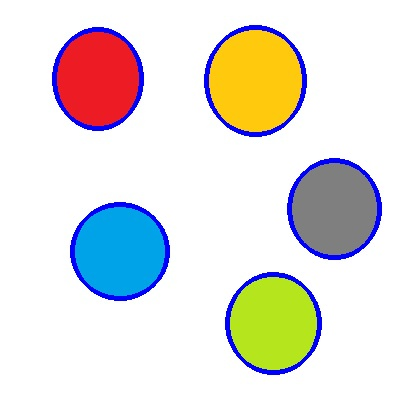

In [ ]:
import cv2
import numpy as np
from IPython.display import Image

image = cv2.imread("circulos.jpg")
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

thresh = cv2.adaptiveThreshold(img, 200, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 23, 3)

contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]   
for contours in contours:
  area = cv2.contourArea(contours)
    
  if area > 10:
    cv2.drawContours(image, [contours], 0, (255, 0, 0), 3)

cv2.imwrite("thresh_circulos.jpg", image)
filename = "thresh_circulos.jpg"
display(Image(filename))

Contorno com canny

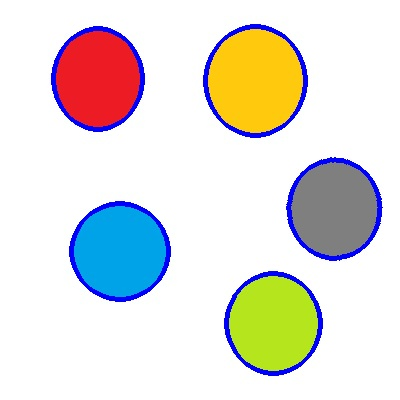

In [ ]:
import cv2
import numpy as np
from IPython.display import Image

image = cv2.imread("circulos.jpg")
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

canny = cv2.Canny(img,20,100)

contours = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]   
for contours in contours:
  area = cv2.contourArea(contours)
    
  if area > 10:
    cv2.drawContours(image, [contours], 0, (255, 0, 0), 3)

cv2.imwrite("canny_circulos.jpg", image)
filename = "canny_circulos.jpg"
display(Image(filename))

#aula 10/09

mudar o brilho e contraste da imagem

In [ ]:
import cv2
import numpy as np

def contrasteBrilho(img, alpha, beta):
  for y in range(img.shape[0]):
    for x in range(img.shape[1]):
      for c in range(img.shape[2]):
        img[y, x, c] = np.clip(alpha * img[y, x, c] + beta, 0, 255)
  cv2.imwrite("fileCB.jpg", img)

image = cv2.imread("file.jpg")

contrasteBrilho(img, 2, 100)



mudar a resolução da imagem

In [ ]:
import cv2
import numpy as np


def Resize_imagem(img, escale_percent):
  altura = int(img.shape[1] * escale_percent / 100)
  largura = int(img.shape[0] * escale_percent / 100)
  dim = (altura, largura)

  nova_imagem = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
  cv2.imwrite("file" + str(escale_percent) + "%.jpg", nova_imagem)

image = cv2.imread("file.jpg")

Resize_imagem(image, 200)


valores de pico
91 	 5825 	 -5787
122 	 5482 	 -5178
127 	 5718 	 -5749
192 	 6017 	 -5936
196 	 6637 	 -6930


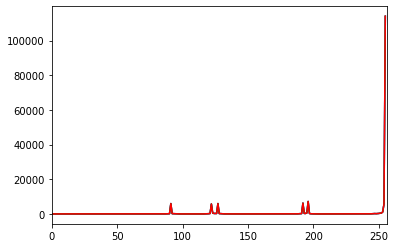

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pylab as plt

image = cv2.imread("circulos.jpg")
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
height, width, bytesByPixel = np.shape(image)

histogram = cv2.calcHist([img],[0],None,[256],[0,256])
#for x in range(0,255):
#  print( x, "\t",int(histogram[x]),end="\n")

print("\nvalores de pico")
for i in range(254):
  pto_mais = histogram[i + 1] - histogram[i]
  pto_menos = histogram[i + 2] - histogram[i + 1]
  if (( pto_mais > 1000) and (pto_menos < 0) and pto_mais < 10000):
    print ( int(i + 1), "\t", int(pto_mais), "\t", int(pto_menos), end = "\n")

color = ("b", "g", "r")
for i, col in enumerate(color):
  histr = cv2.calcHist([img], [0], None, [256], [0, 256])
  plt.plot(histr, color = col)
  plt.xlim([0, 256])
plt.show()

cv2.imwrite("teste.jpg", img)

Exercício

91 início: [55, 30], término: [140, 127]

122 início: [73, 209], término: [166, 294]

127 início: [297, 168], término: [378, 256]

192 início: [228, 281], término: [318, 369]

196 início: [208, 32], término: [303, 126]



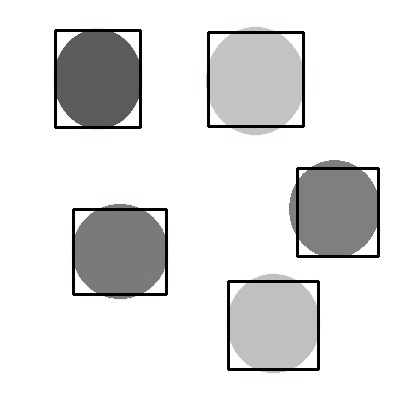

In [ ]:
import cv2
import numpy as np
import matplotlib.pylab as plt
from IPython.display import Image

image = cv2.imread("circulos.jpg")
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
height, width = np.shape(img)

def coordenadas(pico):
  listPX = []
  listPY = []
  
  _, thresh1 = cv2.threshold(img, pico, 255, cv2.THRESH_TOZERO_INV)
  _, thresh2 = cv2.threshold(thresh1, pico - 1, 255, cv2.THRESH_TOZERO)

  blur = cv2.blur(thresh2, (3,3))

  for py in range(height):
   for px in range(width):
      if blur[py][px] == pico:
        listPX.append(px)
        listPY.append(py)
  
  inicio = [min(listPX), min(listPY)]
  termino = [max(listPX), max(listPY)] 
  cv2.rectangle(img, (min(listPX), min(listPY)), (max(listPX), max(listPY)), [0, 0, 0],2)
  print(str(pico) + " início: " + str(inicio) + ", término: " + str(termino) + "\n")
  return img

histogram = cv2.calcHist([img],[0],None,[256],[0, 256])
for i in range(254):
  pto_mais = histogram[i + 1] - histogram[i]
  pto_menos = histogram[i + 2] - histogram[i + 1]
  if (( pto_mais > 100) and (pto_menos < 0)):
    coordenadas(i + 1)

cv2.imwrite("new_circulos.jpg", img)
filename = "new_circulos.jpg"
display(Image(filename))

#aula 04/09

In [ ]:
import cv2
import numpy as np

image = cv2.imread("file.jpg")
height, width, bytesByPixel = np.shape(image)
img = np.zeros([height, width, 3])

for py in range(height):
  for px in range(width):
    img[py][px][0] = image[py][px][0]
    img[py][px][1] = image[py][px][0]
    img[py][px][2] = image[py][px][0]
cv2.imwrite("file1.jpg", img)

for py in range(height):
  for px in range(width):
    img[py][px][0] = image[py][px][1]
    img[py][px][1] = image[py][px][1]
    img[py][px][2] = image[py][px][1]
cv2.imwrite("file2.jpg", img)

for py in range(height):
  for px in range(width):
    img[py][px][0] = image[py][px][2]
    img[py][px][1] = image[py][px][2]
    img[py][px][2] = image[py][px][2]
cv2.imwrite("file3.jpg", img)

img1 = cv2.imread("file1.jpg", 0)
img2 = cv2.imread("file2.jpg", 0)
img3 = cv2.imread("file3.jpg", 0)
ret, thresh1 = cv2.threshold(img1, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img2, 127, 255, cv2.THRESH_BINARY)
ret, thresh3 = cv2.threshold(img3, 127, 255, cv2.THRESH_BINARY)

cv2.imwrite("file1v2.jpg", thresh1)
cv2.imwrite("file2v2.jpg", thresh2)
cv2.imwrite("file3v2.jpg", thresh3)

True

#aula 03/09

In [ ]:
import cv2
import numpy as np

image = cv2.imread("file.jpg")
height, width, bytesByPixel = np.shape(image)
img = np.zeros([height, width, 3])

for py in range(height):
  for px in range(width):
    c = (image[py][px][0] * 0.11) + (image[py][px][1] * 0.59) + (image[py][px][2] * 0.29)
    img[py][px][0] = c
    img[py][px][1] = c
    img[py][px][2] = c
cv2.imwrite("fileC.jpg", img)

True

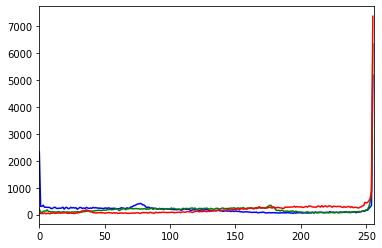

In [ ]:
import cv2
import matplotlib.pylab as plt

imagem = cv2.imread("file.jpg")
color = ("b", "g", "r")
for i, col in enumerate(color):
  histr = cv2.calcHist([imagem], [i], None, [256], [0, 256])
  plt.plot(histr, color = col)
  plt.xlim([0, 256])
plt.show()

#aula 28/08

In [ ]:
import cv2
import numpy as np

image = cv2.imread("color_img.png")
altura, largura, vytesPorPixel = np.shape(image)

for index in range(3):
  if index == 0:
    print("azul")
  elif index == 1:
    print("verde")
  else:
    print("vermelho")
  for py in range(altura):
    for px in range(largura):
      print(image[py][px][index], '\t', end='')
    print("\n")

azul
0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	

0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	

0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	

0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	

0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	

0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	

0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	

0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	

0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	

0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	

verde
255 	255 	255 	255 	255 	255 	255 	255 	255 	255 	

255 	255 	255 	255 	255 	255 	255 	255 	255 	255 	

255 	255 	255 	255 	255 	255 	255 	255 	255 	255 	

255 	255 	255 	255 	255 	255 	255 	255 	255 	255 	

255 	255 	255 	255 	255 	255 	255 	255 	255 	255 	

255 	255 	255 	255 	255 	255 	255 	255 	255 	255 	

255 	255 	255 	255 	255 	255 	255 	255 	255 	255 	

255 	255 	255 	255 	255 	255 	255 	255 	255 	255 	

255 	255 	255 	255 	255 	255 	255 	255 	255 	255 	

255 	255 	255 	255 	255 	255 	255 	255 	255 	255 	

vermelho
255 	255 	255 	255 	255 	255 	255 	255 	255 	255 	

255 	255 	255 	255 	255 	255 	255 	255 	255 	255 	

255 	255 	255 	255 	255 	255 	255 	2

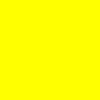

In [ ]:
from IPython.display import Image

filename = "color_img.png"

display(Image(filename))

#aula 27/08

lista: um array

In [ ]:
lista1 = [1, 2, 3, "oi"]
print(lista1[1])

2


tuplas: um array cujo valor não pode ser alterado

In [ ]:
tuplas1 = (1, 2, 3, "oi")
print(tuplas1[1])

2


dicionário: um array onde cada valor possui um index

In [ ]:
dicionario1 = {"arroz" : 13.5, "feijão" : 10.3, "carne" : 6.9}
print(dicionario1["feijão"])

10.3


In [ ]:
import numpy as np

a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(a[1][0])

4


Exercício 1

In [ ]:
L = [5, 7, 2, 9, 4, 1, 3]
a = len(L)
b = max(L)
c = min(L)
d = 0
for x in range(a):
  d += L[x]

print("a = " + str(a))
print("b = " + str(b))
print("c = " + str(c))
print("d = " + str(d))
L.sort()
print("e = " + str(L))
L.reverse()
print("f = " + str(L))


a = 7
b = 9
c = 1
d = 31
e = [1, 2, 3, 4, 5, 7, 9]
f = [9, 7, 5, 4, 3, 2, 1]


Exercício 2

In [ ]:
x = int(input("digite um valor: "))
y = int(input("digite outro valor: "))
z = ((x * 2) + (y * 2)) * ((x - y) * (x - y))
print(z)

digite um valor: 2
digite outro valor: 3
10


Exercício 3

In [ ]:
Lanchonete = {"salgado" : 4.5, "lanche" : 6.5, "suco" : 3, "refrigerante": 3.5, "doce": 1}
print(Lanchonete)

{'salgado': 4.5, 'lanche': 6.5, 'suco': 3, 'refrigerante': 3.5, 'doce': 1}


# aula 21/08

exemplo 1

In [ ]:
print("Hello World")

Hello World


exemplo 2

In [ ]:
import cv2
import numpy as np

altura = 100
largura = 100
img = np.zeros([altura, largura, 3])
dado = []
for py in range(altura):
  for px in range(largura):
    img[py][px][0] = 23
    img[py][px][1] = 200
    img[py][px][2] = 123
    dado.append(img[py][px][0])
cv2.imwrite("color_img5.png", img)
print(dado)
print(len(dado))


[23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.

In [ ]:
import cv2
import numpy as np

img = cv2.imread("color_img.png")
altura, largura, pixel = np.shape(img)
valor = []
for index in range(pixel):
  for py in range(altura):
    for px in range(largura):
      
      
print(img[0][0][2])

231
